In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# development data
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_df = pd.read_csv('test.csv')

In [8]:
test_df.shape

(418, 11)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
sum(titanic_df.duplicated())

0

In [12]:
sum(test_df.duplicated())

0

In [13]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
round(titanic_df.isnull().sum()*100/len(titanic_df.index),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

ValueError: cannot convert float NaN to integer

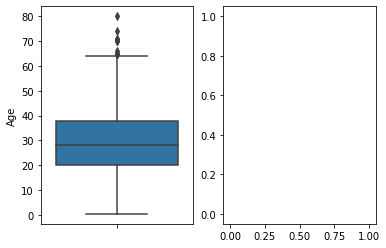

In [18]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.boxplot(y=titanic_df['Age'])
plt.subplot(1,2,2)
sns.distplot(titanic_df['Age'])
plt.show()

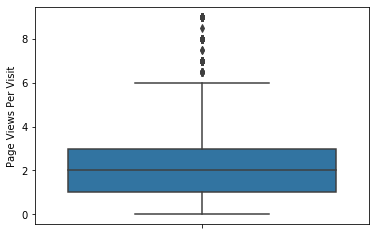

In [95]:
Q3 = leads_out['Page Views Per Visit'].quantile(0.99)
leads_out = leads_out[leads_out['Page Views Per Visit'] <= Q3]
Q1 = leads_out['Page Views Per Visit'].quantile(0.01)
leads_out = leads_out[leads_out['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_out['Page Views Per Visit'])
plt.show()

In [96]:
leads_out.shape

(8953, 14)

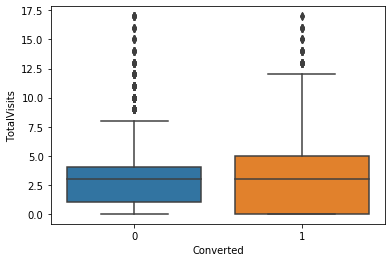

In [97]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_out)
plt.show()

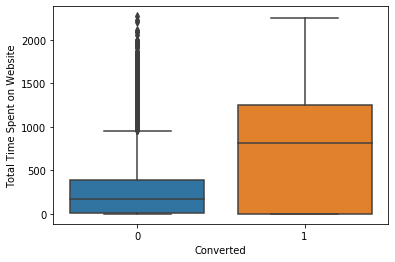

In [98]:
sns.boxplot(x=leads_out.Converted, y=leads_out['Total Time Spent on Website'])
plt.show()

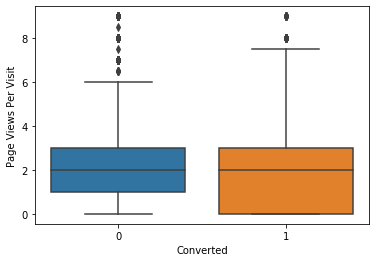

In [100]:
sns.boxplot(x=leads_out.Converted,y=leads_out['Page Views Per Visit'])
plt.show()

In [101]:
round(100*(leads_out.isnull().sum()/len(leads_out.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [102]:
cat_cols= leads_out.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [103]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_out[varlist] = leads_out[varlist].apply(binary_map)

In [104]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads_out[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads_out = pd.concat([leads_out,dummy],1)

In [105]:
leads_out.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [106]:
dummy = pd.get_dummies(leads_out['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)

In [107]:
dummy = pd.get_dummies(leads_out['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)
dummy = pd.get_dummies(leads_out['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)
dummy = pd.get_dummies(leads_out['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)
dummy = pd.get_dummies(leads_out['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)

In [108]:
leads_out

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,1
5,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,1
7,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9,API,Google,0,0,4.0,58,4.00,Email Opened,Management_Specializations,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [109]:
leads_out.drop(cat_cols,1,inplace = True)

In [110]:
leads_out.shape

(8953, 57)

In [111]:
from sklearn.model_selection import train_test_split
y = leads_out['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
X = leads_out.drop('Converted',axis=1)

In [113]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
TotalVisits                                             6267 non-null float64
Total Time Spent on Website                             6267 non-null int64
Page Views Per Visit                                    6267 non-null float64
Lead Origin_Landing Page Submission                     6267 non-null uint8
Lead Origin_Lead Add Form                               6267 non-null uint8
Lead Origin_Lead Import                                 6267 non-null uint8
What is your current occupation_Housewife               6267 non-null uint8
What is your current occupation_Other                   6267 non-null uint8
What is your current occupation_Student                 6267 non-null uint8
What is your current occupation_Unemployed              6267 non-null uint8
What is your current occupation_Working Professional    6267 non-null uint8
City_Other Cities                                 

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_columns = X_train.select_dtypes(include=['float64','int64']).columns

In [120]:
num_columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [121]:
X_train[num_columns]=scaler.fit_transform(X_train[num_columns])

In [123]:
X_train[num_columns].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
9196,0.668862,1.848117,1.455819
4696,-0.030697,-0.037832,0.399961
3274,0.319082,-0.642138,-0.127967
2164,-0.380477,-0.154676,-0.127967
1667,0.319082,1.258415,-0.481679


In [124]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [126]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.1
Date:                Wed, 02 Oct 2019   Deviance:                       2354.3
Time:                        10:15:32   Pearson chi2:                 7.94e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7350      1.986      0.370      0.711      -3.158       4.628
TotalVisits                                              0.2240      0.077      2.906      0.004       0.073       0.375
Total Time Spent on Website                              1.0821      0.064     16.962      0.000       0.957       1.207
Page Views Per Visit                                    -0.2764      0.096     -2.872      0.004      -0.465      -0.088
Lead Origin_Landing Page Submission                     -0.7227      0.241     -3.001      0.003      -1.195      -0.251
Lead Origin_Lead Add Form                                1.0665      1.220      0.875      0.382      -1.324       3.457
Lead Origin_Lead Import                                 23.0261   2.48e+04      0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Housewife               19.3045   1.97e+04      0.001      0.999   -3.85e+04    3.86e+04
What is your current occupation_Other                   -0.3072      2.637     -0.116      0.907      -5.476       4.862
What is your current occupation_Student                  0.2456      1.795      0.137      0.891      -3.272       3.763
What is your current occupation_Unemployed              -0.1387      1.691     -0.082      0.935      -3.453       3.176
What is your current occupation_Working Professional     0.8507      1.735      0.490      0.624      -2.550       4.252
City_Other Cities                                        0.2732      0.232      1.178      0.239      -0.181       0.728
City_Other Cities of Maharashtra                        -0.0801      0.290     -0.276      0.782      -0.648       0.488
City_Other Metro Cities                                  0.0053      0.313      0.017      0.987      -0.608       0.618
City_Thane & Outskirts                                  -0.0702      0.229     -0.306      0.759      -0.519       0.379
City_Tier II Cities                                      0.3054      0.624      0.490      0.624      -0.917       1.527
Specialization_Banking, Investment And Insurance         0.5416      0.372      1.455      0.146      -0.188       1.271
Specialization_Business Administration                  -0.0227      0.352     -0.064      0.949      -0.712       0.667
Specialization_E-Business                                0.1579      0.673      0.235      0.815      -1.162       1.477
Specialization_E-COMMERCE                                0.3421      0.512      0.669      0.504      -0.661       1.345
Specialization_International Business                   -0.1343      0.472     -0.285      0.776      -1.059       0.791
Specialization_Management_Specializations                0

In [129]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [130]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [131]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 30),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [134]:
cols = X_train.columns[rfe.support_]

In [135]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [137]:
logm2 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Wed, 02 Oct 2019   Deviance:                       2509.3
Time:                        10:29:34   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [138]:
cols = cols.drop('Lead Source_Referral Sites',1)

In [140]:
logm3 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Wed, 02 Oct 2019   Deviance:                       2510.7
Time:                        10:32:51   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

In [141]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


In [142]:
cols = cols.drop('Last Notable Activity_SMS Sent',1)

In [143]:
logm4 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Wed, 02 Oct 2019   Deviance:                       2526.6
Time:                        10:34:31   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [144]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


In [164]:
y_train_pred = logm4.fit().predict(sm.add_constant(X_train[cols]))

In [165]:
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [166]:
y_train_pred = y_train_pred.values.reshape(-1)

In [167]:
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [169]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted-Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [171]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted-Prob'].map(lambda x:1 if x > 0.5 else 0)

In [173]:
y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [176]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final['Predicted'])

In [177]:
print(confusion)

[[3693  189]
 [ 281 2104]]


In [178]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final['Predicted']))

0.9250039891495133


In [181]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [182]:
sensitivity = TP/float(TP+FN)

In [183]:
sensitivity

0.8821802935010482

In [184]:
specificity = TN/float(TN+FP)

In [185]:
specificity

0.9513137557959814

In [186]:
FPR = FP/float(TN+FP)

In [187]:
FPR

0.04868624420401855

In [188]:
PPV = TP/float(TP+FP)

In [189]:
PPV

0.9175752289576974

In [190]:
NPV = TN/float(TN+FN)

In [191]:
NPV

0.9292903875188727

In [192]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [194]:
fpr,tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final['Converted-Prob'],drop_intermediate=False)

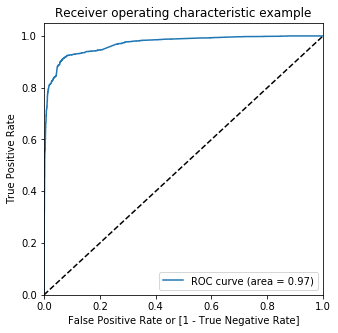

In [196]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final['Converted-Prob'])

In [199]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted-Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [200]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


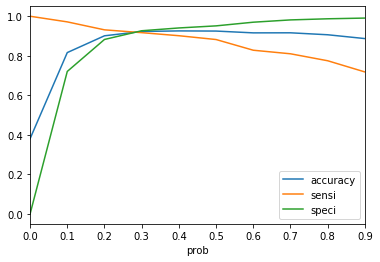

In [201]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [203]:
y_train_pred_final['final_Predicted'] = y_train_pred_final['Converted-Prob'].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [206]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted-Prob'].map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted-Prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted-Prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [207]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_Predicted)

0.922929631402585

In [208]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_Predicted)

In [209]:
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [211]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

sensitivity = TP/float(TP+FN)

sensitivity

specificity = TN/float(TN+FP)

specificity

FPR = FP/float(TN+FP)

FPR

PPV = TP/float(TP+FP)

PPV

NPV = TN/float(TN+FN)

NPV

0.9478260869565217

In [212]:
Precision = TP/float(TP+FP)

In [213]:
Precision

0.8847087378640777

In [214]:
Recall = TP/float(TP+FN)

In [215]:
Recall

0.9169811320754717

In [216]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8847087378640777

In [217]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9169811320754717

In [219]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Converted-Prob'])

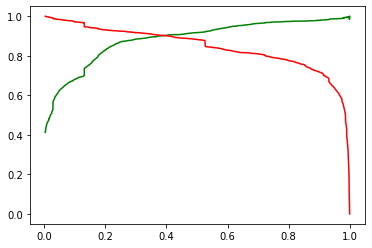

In [220]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()